In [11]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

In [12]:
x_train.shape

(60000, 28, 28)

60000 Samples of Images 28x28 = 784 Length array

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

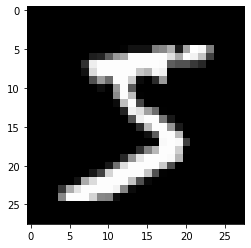

In [15]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

# Flattening the Image Data
We are going to simplify thing and reshape data from 2D image into single 1D array

In [16]:
x_train = x_train.reshape(60000,784)
x_valid = x_valid.reshape(10000,784)
x_train.shape

(60000, 784)

In [17]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# Normalizing the Image Data
Deep learning models are better at dealing with floating point numbers between 0 and 1
So we are going to divide values by 255(max value)

In [18]:
x_train = x_train / 255
x_valid = x_valid / 255

In [19]:
x_train.dtype,x_train.max(), x_train.min()

(dtype('float64'), 1.0, 0.0)

# Categorically Encoding the Labels
y_values are in range of 10, so we create a label with first 10 values.

In [20]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [21]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Creating the Model

In [22]:
from tensorflow.keras.models import Sequential

model  = Sequential()

# Creating the input layer
The `units` argument specifies the number of neurons in the layer. We are going to use `512` which we have chosen from experimentation. Choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset. Try playing around with this value later to see how it affects training and to start developing a sense for what this number means.

We will learn more about activation functions later, but for now, we will use the `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

In [23]:
from tensorflow.keras.layers import Dense

model.add(Dense(units = 512, activation = 'relu',input_shape=(784,)))

# Creating the hidden layer
Now we will add densely connected layer. Again, much more will be said about these later, but for now know that these layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [24]:
model.add(Dense(units = 512, activation = 'relu'))

# Creating the output layer
The output layer is the layer that will be used to make the final predictions. In this case, we will use the `softmax` activation function, which will make the output values between 0 and 1, and will make it easier to interpret the output as a probability distribution.

In [25]:
model.add(Dense(units = 10, activation = 'softmax'))

# Compiling the Model
Again, more details are to follow, but the final step we need to do before we can actually train our model with data is to [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) it. Here we specify a [loss function](https://developers.google.com/machine-learning/glossary#loss) which will be used for the model to understand how well it is performing during training. We also specify that we would like to track `accuracy` while the model trains:

In [31]:
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [28]:
#model.fit(x_train, y_train, epochs = 10, batch_size = 32)

history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)


Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1860 - accuracy: 0.9431 - val_loss: 0.1402 - val_accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0806 - accuracy: 0.9743 - val_loss: 0.0887 - val_accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0569 - accuracy: 0.9818 - val_loss: 0.0780 - val_accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0438 - accuracy: 0.9858 - val_loss: 0.0938 - val_accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0688 - val_accuracy: 0.9802


# Evaluating the Model

In [29]:
score = model.evaluate(x_valid, y_valid, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06884608417749405
Test accuracy: 0.9801999926567078


## ☆ Bonus Exercise ☆

Have time to spare? In the next section, we will talk about how we arrived at some of the numbers above, but we can try imagining what it was like to be a researcher developing the techniques commonly used today.

Ultimately, each neuron is trying to fit a line to some data. Below, we have some datapoints and a randomly drawn line using the equation [y = mx + b](https://www.mathsisfun.com/equation_of_line.html).

Try changing the `m` and the `b` in order to find the lowest possible loss. How did you find the best line? Can you make a program to follow your strategy?

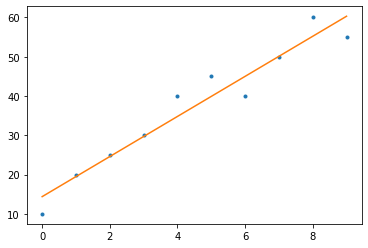

Loss: 14.905000000000006


In [35]:
import numpy as np
import matplotlib.pyplot as plt
m = 5.1
b = 14.4

# Sample data

x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))